<h1 style="color:rgb(0,120,170)">Assignment 1: $k$-nearest neighbors</h1>

<h2 style="color:rgb(0,120,170)">Task 1: Visualization</h2>

Visualize the data stored in `DataSet1.csv` with a scatter plot.<br>
The first two columns are the features which hold the x and y coordinates of the data.<br>
The last column provides the labels of the data. Use different colors for different labels.<br>
Always label the axes of all your plots.

<h3 style="color:rgb(210,90,80)">Code (20 points):</h3>

In [2]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt


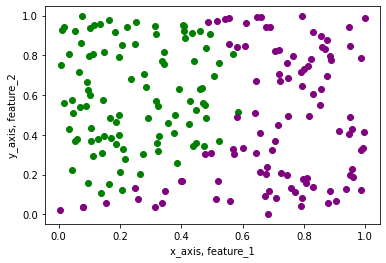

In [3]:
# read data, split into X(features) and y(labels)
Z = np.genfromtxt('DataSet1.csv', delimiter=',')
X, y = Z[:,:-1], Z[:,-1] # x contains all information about the data points, y contains the labels
Z_for_last_task = Z # get unflipped labels because in third task they will be filpped
# your code here:
# X[0] is a single datapoint with x and y coordinate

for index, single_value in enumerate(X):
    if int(y[index]) == 1:
        colour = 'purple'
    elif int(y[index]) == -1:
        colour = 'green'
    else:
        colour = 'red'
    
    plt.scatter(single_value[0],single_value[1], c=colour) # single_value[0] is the x-coordinate, 
    #single_value[1] is the y-coordinate of the single data point
    

plt.xlabel('x_axis, feature_1')
plt.ylabel('y_axis, feature_2')
plt.show()


<h3 style="color:rgb(210,90,80)">Question (5 points):</h3>

- Which of the following statements about $k$-nearest neighbors is correct? Tick the correct box (put an "X" in the box):

\[ \]  requires long training time <br>
\[X \]  not suited for large datasets bc you have to consider all datapoints <br>
\[X \]  sensitive to the rescaling of individual features, bc knn concerned with distance datapoints <br>
\[ \]  has many trainable model parameters <br>

<h2 style="color:rgb(0,120,170)">Task 2: Training the model</h2>

Use $k$-nearest neighbors classifiers with $k \in \{1,3,5,...,177,179\}$.<br>
Either use the `KNeighborsClassifier` function from `sklearn` or implement it on your own.<br>
Estimate the generalization error with zero-one loss via the empirical risk (see lecture Unit 1, p.25 ff.) and use 10-fold
cross validation.<br>
Visualize your results, i.e., plot the error (as defined above) vs. $k$ of $k$-nearest neighbors classifiers.
<br>
<br>
Hint: implement a function that takes the feature matrix ($X$), the label vector ($y$), the number of CV folds ($nf$), $k$ of the $k$-nearest neighbors classifiers ($k$) as arguments:<br>
`def evaluate_kNN(X,y,nf,k):`<br>
It should return the mean error (as defined above) over the CV folds.

<h3 style="color:rgb(210,90,80)">Code (15 points):</h3>

In [25]:
#method for kNN
from sklearn.model_selection import KFold
from sklearn import neighbors

# your code here:
import random
from sklearn.neighbors import KNeighborsClassifier
from torch.utils.data import Subset
random.seed(1234) # results become replicable
# Get a random k:
#k = (int(random.randint(1,179)))
#if k % 2 == 0:
    #k = k+1
# Choose k by yourself:
#k = []

#k = [1,5,11,21,51,101,151,179]
random.seed(1234)
empirical_risks_list = []


# First we have to train the model: complexity training KNN only O(1) 
# split up data set into 10 parts:
# create random indices:
random_numbers_as_indices = np.random.permutation((len(X))) 
indices_fold_1 = random_numbers_as_indices[:int((len(X)/10))]
indices_fold_2 = random_numbers_as_indices[int((len(X)/10)):int((len(X)/10))*2] # [inclusive, exclusive]
indices_fold_3 = random_numbers_as_indices[int((len(X)/10))*2:int((len(X)/10))*3]
indices_fold_4 = random_numbers_as_indices[int((len(X)/10))*3:int((len(X)/10))*4]
indices_fold_5 = random_numbers_as_indices[int((len(X)/10))*4:int((len(X)/10))*5]
indices_fold_6 = random_numbers_as_indices[int((len(X)/10))*5:int((len(X)/10))*6]
indices_fold_7 = random_numbers_as_indices[int((len(X)/10))*6:int((len(X)/10))*7]
indices_fold_8 = random_numbers_as_indices[int((len(X)/10))*7:int((len(X)/10))*8]
indices_fold_9 = random_numbers_as_indices[int((len(X)/10))*8:int((len(X)/10))*9]
indices_fold_10 = random_numbers_as_indices[int((len(X)/10))*9:int((len(X)/10))*10]
list_indices_fold = []
list_indices_fold.append(indices_fold_1)
list_indices_fold.append(indices_fold_2)
list_indices_fold.append(indices_fold_3)
list_indices_fold.append(indices_fold_4)
list_indices_fold.append(indices_fold_5)
list_indices_fold.append(indices_fold_6)
list_indices_fold.append(indices_fold_7)
list_indices_fold.append(indices_fold_8)
list_indices_fold.append(indices_fold_9)
list_indices_fold.append(indices_fold_10)

for single_k in range(1,180): # determine the empirical risk and loss for the chosen single ks:
    knn = KNeighborsClassifier(n_neighbors = single_k)
    # empirical risk estimation: sum up all losses and devide them by the number of losses/tested points


    # Now we can generate the training and testset for each of the ten iterations:
    # In each iteration calculate the loss and add it to the final loss:
    final_loss = 0
    #big_iteration_all_training_epochs = 0
    #while big_iteration_all_training_epochs < 10:
    iteration = 0
    second_indices_list = []

    while iteration < 10: # we have 10 folds --> 10 iterations 

        for index_of_fold, single_fold_with_ind in enumerate(list_indices_fold):
            if iteration == index_of_fold: 
                current_testset = Subset(Z, indices=single_fold_with_ind)
                test_array_features = []
                test_array_labels = []
                for i in current_testset:
                    current_testset_features = i[:-1]
                    current_testset_labels =i[-1]
                    test_array_features.append(current_testset_features)
                    test_array_labels.append(current_testset_labels)
            else:
                second_indices_list.extend(single_fold_with_ind)


        # Now we want to generate the trainset
        current_trainset = Subset(Z, indices=second_indices_list)

        train_array_features = []
        train_array_labels = []
        for i in current_trainset:
            current_trainset_features = i[:-1]
            current_trainset_labels =i[-1]
            train_array_features.append(current_trainset_features)
            train_array_labels.append(current_trainset_labels)

        # Before calculating the loss you have to look, which labels the testset gets by knn:
        knn.fit(train_array_features, train_array_labels)
        knn_predicted_labels = knn.predict(test_array_features)
        
        # Compare the predicted labels with the real ones:
        single_loss = 0
        for index, label in enumerate(test_array_labels): 
            # zero-one loss: correct classification --> assign 0 to loss; false classification --> assign 1 to loss
            if int(test_array_labels[index]) != int(knn_predicted_labels[index]): # Predicted wrongly
                single_loss += 1 # each training epoch has its own loss
        final_loss += single_loss # final loss is the loss over all 10 testsets out of 10 training epochs

        # the scores tell us how good the model was in this training period (one of 10) # Not needed!
        #single_score = knn.score(test_array_features, test_array_labels) # we get 10 scores out of 10 testsets
       # if single_score >= 0: # then 


        iteration += 1
        #big_iteration_all_training_epochs += 1


    # Now we have the final loss. Calculate the empirical risk:
    empirical_risk = final_loss / 10 # divided through 10 because we have 10 losses
    # The maximal value of the empirical risk would be 20xFalse*10xtimes/10xsmall_losses = 20
    # The minimal empirical risk would be 0 
    empirical_risks_list.append(empirical_risk)
    

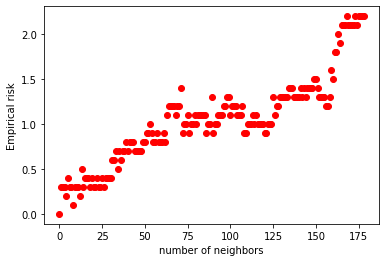

In [26]:
for index, ele in enumerate(empirical_risks_list):
    plt.scatter(k[index],ele, c='red') 

plt.ylabel('Empirical risk')
plt.xlabel('number of neighbors')
plt.show()


<h3 style="color:rgb(210,90,80)">Question (10 points):</h3>

* Thinking of model complexity as the ability of the model to fit to noise, what choice of $k$ gives complex models? Why?

Tick the correct box:

\[  \]  Model complexity increases with increasing $k$, as larger $k$ means the model has more parameters. <br>
\[  \]  Model complexity increases with increasing $k$, as larger $k$ means that more neighbors influence the decision. <br>
\[ X \]  Model complexity increases with decreasing $k$, as smaller $k$ means that fewer neighbors influence the decision. <br>
\[  \]  Model complexity increases with decreasing $k$, as smaller $k$ means the model has fewer parameters. <br>

* For the data above, how does the error develop with the model complexity? Why? Look again at the data - do the labels appear to be noisy?
The error seems to be less when k is very smalland the model complexity is high. However, for k = 1 there should be overfitting for normal but it isn't here the case. Possible reasons: 
--> Overrepresentation of one label: There aren't too much samples for one label compared to the other (see below). 
--> Look at the scatter plot of task 1: The data set is small. The two labels are well sepearated, only a few samples of different labels are near to each other. Only when you use these few critical samples as testset the model will predict wrongly for small k. There are only a few of these cases such that the overall error becomes small.

Tick the correct box:

\[ X \]  The error increases with increasing $k$, as there is hardly any noise in the data <br>
\[  \]  The error increases with increasing $k$, as there is a lot of noise in the data <br>
\[  \]  The error increases with decreasing $k$, as there is hardly any noise in the data <br>
\[  \]  The error increases with decreasing $k$, as there is a lot of noise in the data <br>

In [6]:
# Is there a label with to much poportion in the data?:
counter_1 = 0
counter_minus_1 = 0
counter_what = 0
for i in y:
    if int(i) == 1:
        counter_1 += 1
    elif int(i) == -1:
        counter_minus_1 += 1
    else:
        counter_what += 1
print('Label 1:', counter_1, 'times')
print('Label -1:', counter_minus_1, 'times')
print('Label unkown:', counter_what, 'times')
# There isn't one label dominant in the dataset.


Label 1: 101 times
Label -1: 99 times
Label unkown: 0 times


<h2 style="color:rgb(0,120,170)">Task 3: Add noise to labels</h2>

Flip the sign of the labels of the data randomly with probability of $\frac{1}{5}$. Use the random seed given below. Perform the same steps as before, i.e. plot the data and plot the error (estimated via the empirical risk) vs. $k$ for 10-fold cross validation.

<h3 style="color:rgb(210,90,80)">Code (15 points):</h3>

In [7]:
#flip labels of data
np.random.seed(1234)

# your code here:
my_prob_list = [1,2,3,4,5]
for ind, label in enumerate(y):
    if random.choice(my_prob_list) == 5: # the probability for that happening is 1/5
        if y[ind] == -1:
            y[ind] = 1
        else:
            y[ind] = -1


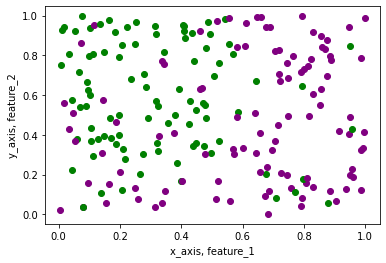

In [8]:
for index, single_value in enumerate(X):
    if int(y[index]) == 1:
        colour = 'purple'
    elif int(y[index]) == -1:
        colour = 'green'
    else:
        colour = 'red'
    
    plt.scatter(single_value[0],single_value[1], c=colour) # single_value[0] is the x-coordinate, 
    #single_value[1] is the y-coordinate of the single data point
    

plt.xlabel('x_axis, feature_1')
plt.ylabel('y_axis, feature_2')
plt.show()
# Now the data sample of different labels are quite more mixed:


In [9]:
random.seed(1234)
empirical_risks_list = []
for single_k in k: # determine the empirical risk and loss for the chosen single ks:
    knn = KNeighborsClassifier(n_neighbors = single_k)

    # empirical risk estimation: sum up all losses and devide them by the number of losses/tested points

    # First we have to train the model: complexity training KNN only O(1) 
    # split up data set into 10 parts:
    # create random indices:
    


    # Now we can generate the training and testset for each of the ten iterations:
    # In each iteration calculate the loss and add it to the final loss:
    final_loss = 0
    #big_iteration_all_training_epochs = 0
    #while big_iteration_all_training_epochs < 10:
    iteration = 0
    second_indices_list = []

    while iteration < 10: # we have 10 folds --> 10 iterations 

        for index_of_fold, single_fold_with_ind in enumerate(list_indices_fold):
            if iteration == index_of_fold: 
                current_testset = Subset(Z, indices=single_fold_with_ind) 
                test_array_features = []
                test_array_labels = []
                for i in current_testset:
                    current_testset_features = i[:-1]
                    current_testset_labels =i[-1]
                    test_array_features.append(current_testset_features)
                    test_array_labels.append(current_testset_labels)
            else:
                second_indices_list.extend(single_fold_with_ind)


        # Now we want to generate the trainset
        current_trainset = Subset(Z, indices=second_indices_list)

        train_array_features = []
        train_array_labels = []
        for i in current_trainset:
            current_trainset_features = i[:-1]
            current_trainset_labels =i[-1]
            train_array_features.append(current_trainset_features)
            train_array_labels.append(current_trainset_labels)
        
        # Before calculating the loss you have to look, which labels the testset gets by knn:
        knn.fit(train_array_features, train_array_labels)
        knn_predicted_labels = knn.predict(test_array_features)
        # Compare the predicted labels with the real ones:
        single_loss = 0
        for index, label in enumerate(test_array_labels): 
            # zero-one loss: correct classification --> assign 0 to loss; false classification --> assign 1 to loss
            if int(test_array_labels[index]) != int(knn_predicted_labels[index]): # Predicted wrongly
                single_loss += 1 # each training epoch has its own loss
        final_loss += single_loss # final loss is the loss over all 10 testsets out of 10 training epochs

        # the scores tell us how good the model was in this training period (one of 10) # Not needed!
        #single_score = knn.score(test_array_features, test_array_labels) # we get 10 scores out of 10 testsets
       # if single_score >= 0: # then 


        iteration += 1
        #big_iteration_all_training_epochs += 1


    # Now we have the final loss. Calculate the empirical risk:
    empirical_risk = final_loss / 10 # divided through 10 because we have 10 losses
    # The maximal value of the empirical risk would be 20xFalse*10xtimes/10xsmall_losses = 20
    # The minimal empirical risk would be 0 
    empirical_risks_list.append(empirical_risk)
    

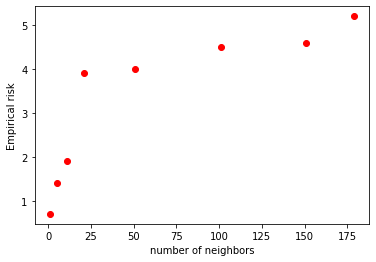

In [70]:
for index, ele in enumerate(empirical_risks_list):
    plt.scatter(k[index],ele, c='red') 

plt.ylabel('Empirical risk')
plt.xlabel('number of neighbors')
plt.show()


<h3 style="color:rgb(210,90,80)">Question (10 points)</h3>

* Which differences do you observe?
* Which conclusions do you draw from that?

Tick the correct boxes:

\[  \]  The two classes are still well seperable and have nearly no overlap <br>
\[ X \]  The two classes are now less seperable and have a larger overlap  <br>

\[ X \]  Random label flipping brings noise into the data <br>
\[  \]  Random label flipping simply swaps data, but no significant changes <br>

\[  \]  Very small values of $k$ correspond to too low model complexity (underfitting) <br>
\[ X \]  Very small values of $k$ correspond to too high model complexity (overfitting) <br>
\[ X \]  Very large values of $k$ correspond to too low model complexity (underfitting) <br>
\[  \]  Very large values of $k$ correspond to too high model complexity (overfitting) <br>

\[  \]  Overall, the error remains nearly unchanged compared to the original data set. <br>
\[ X \]  Overall, the error increases compared to the original data set. <br>

<h2 style="color:rgb(0,120,170)">Task 4: $k$-NN in higher dimensions</h2>

Going back to unflipped labels, add $f$ = 1,2,3,4 random features to the data matrix $X$ which are uniformly distributed between 0 an 1.
Again, plot the error versus $k$ for 10 folds. Plot mean error versus $f$ for $k$ = 11.

<h3 style="color:rgb(210,90,80)">Code (20 points):</h3>

Get dataframe with 1 additional column(s):


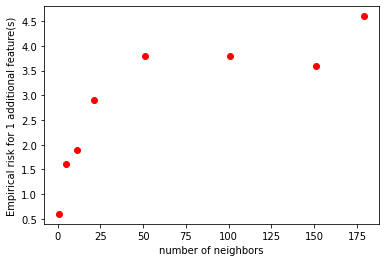

Get dataframe with 2 additional column(s):


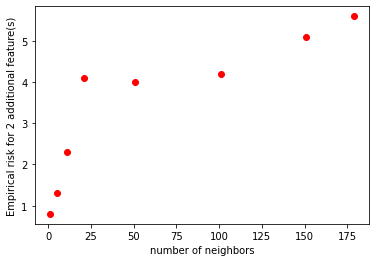

Get dataframe with 3 additional column(s):


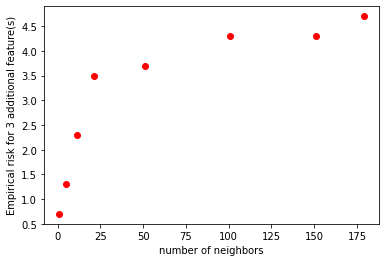

Get dataframe with 4 additional column(s):


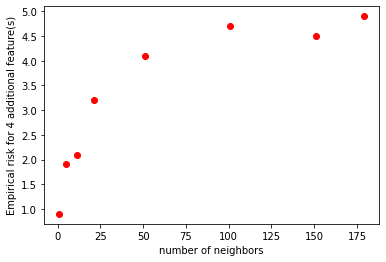

In [88]:
# create a data frame with 1,2,3,4 additional columns
np.random.seed(1234)
from numpy import asarray
# your code here:
# You use a different number for additions columns:
import pandas as pd

for addition in [1,2,3,4]: # Add different number of new feature columns to the dataframe
    df = pd.DataFrame(Z_for_last_task, columns=['feature_1','feature_2','unfilpped_labels'])
    # Add the additional columns:
    
    
        
    print(f'Get dataframe with {addition} additional column(s):')
    for i in range(addition):
        list_added_feature = []
       
        for e in range(len(df.index)):
            list_added_feature.append(random.random())
        
        title = f'new_feature_{i+1}'
        df.insert(2+i, title, list_added_feature, True)
       # df[f'new_feature_{i+1}'] = np.asarray[list_added_feature]
    
    Z1 = df.values
    X, y = Z1[:,:-1], Z1[:,-1] 
   
   # print(X)
    # Paste in:
    empirical_risks_list = []
    for single_k in k: # determine the empirical risk and loss for the chosen single ks:
        knn = KNeighborsClassifier(n_neighbors = single_k)

        # empirical risk estimation: sum up all losses and devide them by the number of losses/tested points


        # Now we can generate the training and testset for each of the ten iterations:
        # In each iteration calculate the loss and add it to the final loss:
        final_loss = 0
        #big_iteration_all_training_epochs = 0
        #while big_iteration_all_training_epochs < 10:
        iteration = 0
        second_indices_list = []

        while iteration < 10: # we have 10 folds --> 10 iterations 

            for index_of_fold, single_fold_with_ind in enumerate(list_indices_fold):
                if iteration == index_of_fold: 
                    current_testset = Subset(Z1, indices=single_fold_with_ind)
                    test_array_features = []
                    test_array_labels = []
                    for i in current_testset:
                        current_testset_features = i[:-1]
                        current_testset_labels =i[-1]
                        test_array_features.append(current_testset_features)
                        test_array_labels.append(current_testset_labels)
                else:
                    second_indices_list.extend(single_fold_with_ind)


            # Now we want to generate the trainset
            current_trainset = Subset(Z1, indices=second_indices_list)
            
            train_array_features = []
            train_array_labels = []
            for i in current_trainset:
                
                current_trainset_features = i[:-1]
                current_trainset_labels =i[-1]
                
                train_array_features.append(current_trainset_features)
                train_array_labels.append(current_trainset_labels)
          
            # Before calculating the loss you have to look, which labels the testset gets by knn:
            knn.fit(train_array_features, train_array_labels)
            knn_predicted_labels = knn.predict(test_array_features)
            # Compare the predicted labels with the real ones:
            single_loss = 0
            for index, label in enumerate(test_array_labels): 
                
                # zero-one loss: correct classification --> assign 0 to loss; false classification --> assign 1 to loss
                if int(test_array_labels[index]) != int(knn_predicted_labels[index]): # Predicted wrongly
                    single_loss += 1 # each training epoch has its own loss

            final_loss += single_loss 
            
            iteration += 1


        # Now we have the final loss. Calculate the empirical risk:
        empirical_risk = final_loss / 10 # divided through 10 because we have 10 losses/testsets
        empirical_risks_list.append(empirical_risk)
    
    # Put in:
    # Visualization Error vs. k:
    for index, ele in enumerate(empirical_risks_list):
        plt.scatter(k[index],ele, c='red') 
    
    plt.ylabel(f'Empirical risk for {addition} additional feature(s)')
    plt.xlabel('number of neighbors')
    plt.show()
    
    

Next task: Plot the mean error for f (k=11):


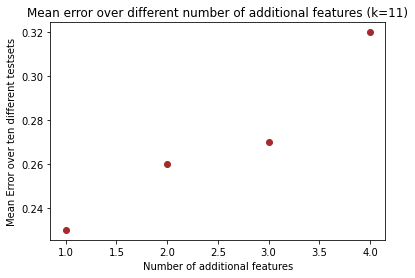

In [67]:
print('Next task: Plot the mean error for f (k=11):')
# Next task: Plot the mean error for f (k=11):

loss_for_single_addings = []
knn = KNeighborsClassifier(n_neighbors = 11)
for addition in [1,2,3,4]: # Add different number of new feature columns to the dataframe
    lossy_list = []
    df = pd.DataFrame(Z_for_last_task, columns=['feature_1','feature_2','unfilpped_labels'])
    # Add the additional columns:
    for i in range(addition):
        list_added_feature = []
       
        for e in range(len(df.index)):
            list_added_feature.append(random.random())
       
        title = f'new_feature_{i+1}'
        df.insert(2+i, title, list_added_feature, True)
    
    Z = df.values
    X, y = Z[:,:-1], Z[:,-1] 
    

    # Now we can generate the training and testset for each of the ten iterations:
    # In each iteration calculate the loss and add it to the final loss:
    final_loss = 0
    #big_iteration_all_training_epochs = 0
    #while big_iteration_all_training_epochs < 10:
    iteration = 0
    second_indices_list = []

    while iteration < 10: # we have 10 folds --> 10 iterations 

        for index_of_fold, single_fold_with_ind in enumerate(list_indices_fold):
            if iteration == index_of_fold: 
                current_testset = Subset(Z, indices=single_fold_with_ind) 
                test_array_features = []
                test_array_labels = []
                for i in current_testset:
                    current_testset_features = i[:-1]
                    current_testset_labels =i[-1]
                    test_array_features.append(current_testset_features)
                    test_array_labels.append(current_testset_labels)
            else:
                second_indices_list.extend(single_fold_with_ind, )
        
        # Now we want to generate the trainset
        current_trainset = Subset(Z, indices=second_indices_list)

        train_array_features = []
        train_array_labels = []
        for i in current_trainset:
            current_trainset_features = i[:-1]
            current_trainset_labels =i[-1]
            train_array_features.append(current_trainset_features)
            train_array_labels.append(current_trainset_labels)

        # Before calculating the loss you have to look, which labels the testset gets by knn:

        knn.fit(train_array_features, train_array_labels)
        knn_predicted_labels = knn.predict(test_array_features)

        # Compare the predicted labels with the real ones:
        loss_for_one_iter = 0
        for index, label in enumerate(test_array_labels): 
            if int(test_array_labels[index]) != int(knn_predicted_labels[index]): # Predicted wrongly
                first = int(knn_predicted_labels[index]) - int(test_array_labels[index]) 
                if first < 0:
                    first = first * (-1)
                loss_for_one_iter += first 
        loss_for_one_iter = (loss_for_one_iter)/len(test_array_labels)
        lossy_list.append(loss_for_one_iter)
        iteration += 1
    adder = 0
    for i in lossy_list: # i is loss for one iter
        adder += i
    adder = adder/10 # loss for single added features over all 10 testsets
    loss_for_single_addings.append(adder)
    
    
    
    
list_features = [1,2,3,4]
for i,e in enumerate(loss_for_single_addings):
    plt.scatter(list_features[i], e, c='brown') 
plt.title('Mean error over different number of additional features (k=11)')
plt.xlabel(f'Number of additional features')
plt.ylabel('Mean Error over ten different testsets')
plt.show()


<h3 style="color:rgb(210,90,80)">Question (5 points)</h3>

* Try to explain possible changes of the error.

Tick the correct boxex:

\[  \]  $k$-nearest neighbors is robust aginst randomly added further features; noise is filtered out <br>
\[ X \]  $k$-nearest neighbors is not robust aginst randomly added further features; noise is not filtered out

\[  \]  The more noise (extra dimensions), the lower the optimal $k$ <br>
\[ X \]  The more noise (extra dimensions), the higher the optimal $k$ <br>